In [36]:
import numpy as np

ncells = 1000  # Number of cells



xmus = [0, 5, 5]
xsds = [1, 0.1, 1]
ymus = [5, 5, 0]
ysds = [1, 0.1, 1]

prop1 = [0.3, 0.5, 0.2]
comp1 = np.random.choice([1, 2, 3], p=prop1, size=ncells, replace=True)


np.random.seed(0)

samples1 = np.column_stack((np.random.normal(loc=np.array(xmus)[comp1-1], scale=np.array(xsds)[comp1-1], size=ncells),
                            np.random.normal(loc=np.array(ymus)[comp1-1], scale=np.array(ysds)[comp1-1], size=ncells)))
ngenes = 100
np.random.seed(0)
proj = np.random.normal(size=(ngenes, 2))

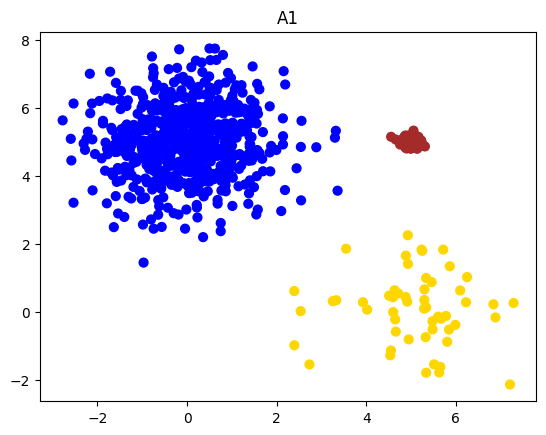

In [45]:
easy_values = [False, True]

prop2 = [0.65, 0.3, 0.05]

# Setting proportions of each of the three cell types in batch 2.
comp2 = np.random.choice([1, 2, 3], p=prop2, size=ncells, replace=True)
samples2 = np.column_stack((np.random.normal(loc=np.array(xmus)[comp2-1], scale=np.array(xsds)[comp2-1], size=ncells),
                            np.random.normal(loc=np.array(ymus)[comp2-1], scale=np.array(ysds)[comp2-1], size=ncells)))
ref_cols = ["blue", "brown", "gold"]
clust1 = [ref_cols[i-1] for i in comp2]

plt.scatter(samples2[:, 0], samples2[:, 1], marker='o', s=40, c=clust1)

plt.title('A1')
plt.show()

X1 = np.dot(samples2, proj.T)

#A2 = np.transpose(A2)
row_names = [f"Cell{i+1}-1" for i in range(ncells)]
col_names = [f"Gene{i+1}" for i in range(ngenes)]


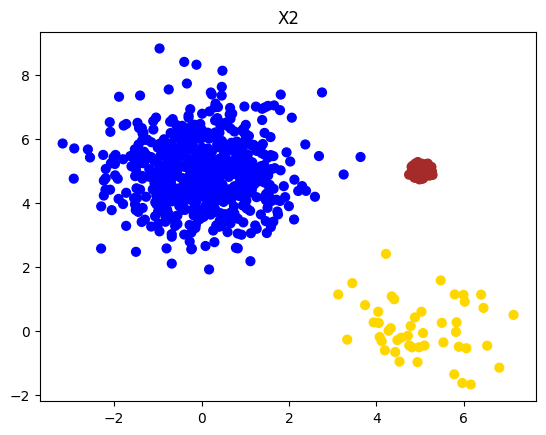

In [46]:
easy_values = [False, True]

prop2 = [0.65, 0.3, 0.05]

# Setting proportions of each of the three cell types in batch 2.
comp2 = np.random.choice([1, 2, 3], p=prop2, size=ncells, replace=True)
samples2 = np.column_stack((np.random.normal(loc=np.array(xmus)[comp2-1], scale=np.array(xsds)[comp2-1], size=ncells),
                            np.random.normal(loc=np.array(ymus)[comp2-1], scale=np.array(ysds)[comp2-1], size=ncells)))
ref_cols = ["blue", "brown", "gold"]
clust2 = [ref_cols[i-1] for i in comp2]

plt.scatter(samples2[:, 0], samples2[:, 1], marker='o', s=40, c=clust2)

plt.title('X2')
plt.show()

X2 = np.dot(samples2, proj.T)

#A2 = np.transpose(A2)
row_names = [f"Cell{i+1}-1" for i in range(ncells)]
col_names = [f"Gene{i+1}" for i in range(ngenes)]


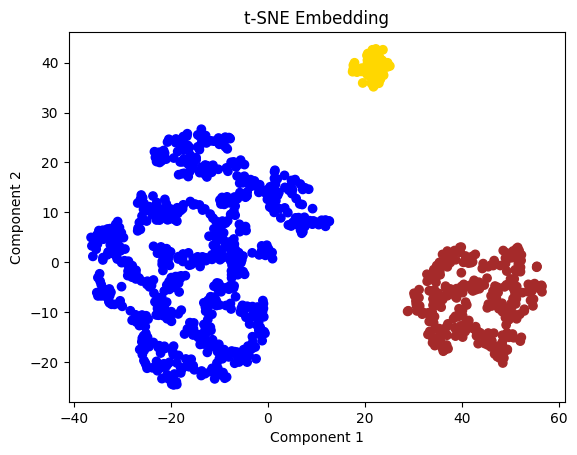

In [47]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_embedded = TSNE(n_components=2).fit_transform(X1)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=clust1)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Embedding')
plt.show()


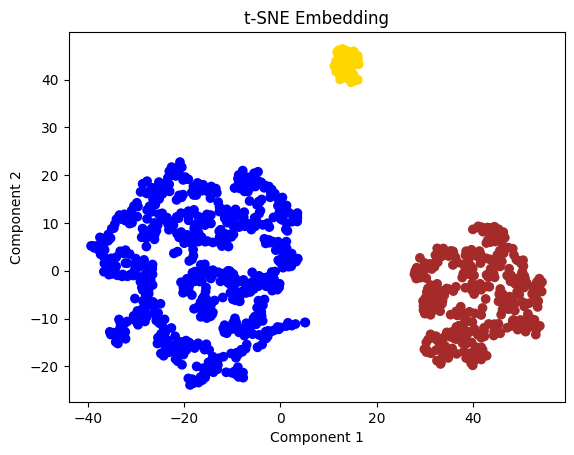

In [48]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_embedded = TSNE(n_components=2).fit_transform(X2)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=clust2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Embedding')
plt.show()


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA

In [50]:
ca = CCA(n_components=10)
ca.fit(X1, X2)
X_c, Y_c = ca.transform(X1, X2)

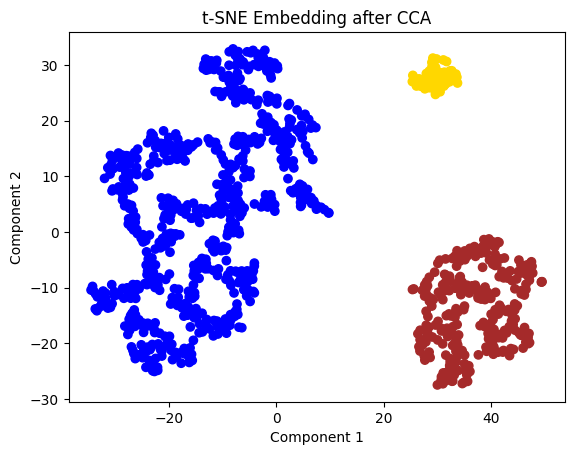

In [55]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_embedded = TSNE(n_components=2).fit_transform(X_c)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=clust1)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Embedding after CCA')
plt.show()


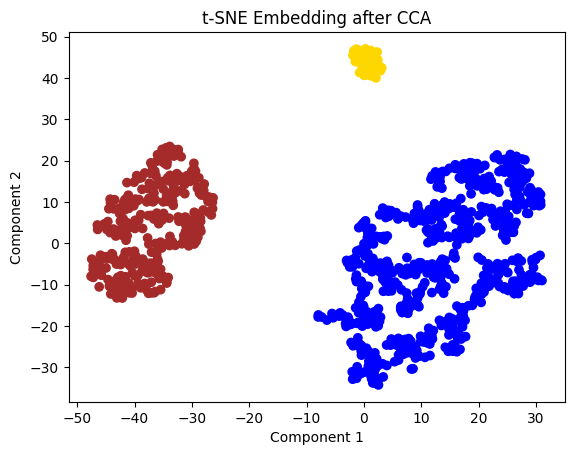

In [54]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_embedded = TSNE(n_components=2).fit_transform(Y_c)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=clust2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Embedding after CCA')
plt.show()
